<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


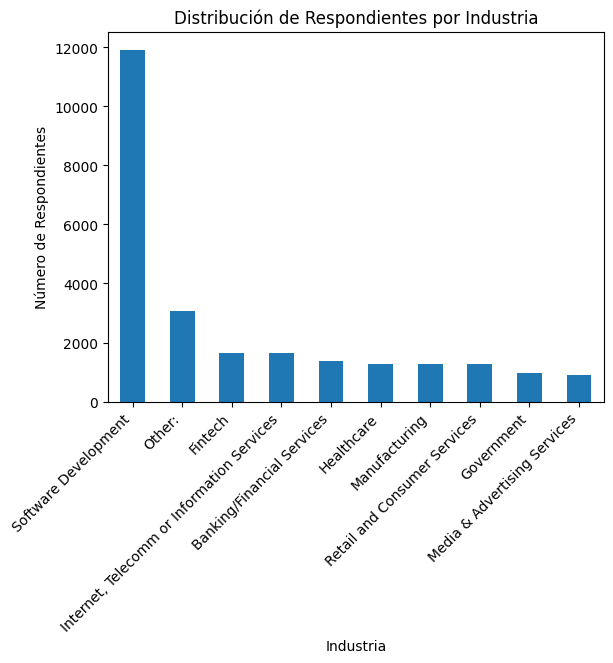

In [3]:
##Write your code here
industry_df = df['Industry'].dropna()

industry_counts = industry_df.value_counts()
top_industries = industry_counts.head(10)

plt.figure()
top_industries.plot(kind='bar')
plt.title('Distribución de Respondientes por Industria')
plt.xlabel('Industria')
plt.ylabel('Número de Respondientes')
plt.xticks(rotation=45, ha='right')
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
comp_df = df['ConvertedCompYearly'].dropna()

mean_comp = comp_df.mean()
median_comp = comp_df.median()
std_comp = comp_df.std()

print("Media:", mean_comp)
print("Mediana:", median_comp)
print("Desviación estándar:", std_comp)

threshold = mean_comp + 3 * std_comp
print("Umbral de outliers:", threshold)

high_comp_outliers = df[df['ConvertedCompYearly'] > threshold]

print("Número de outliers de alta compensación:", high_comp_outliers.shape[0])
high_comp_outliers[['ConvertedCompYearly']].head()


Media: 86155.28726264134
Mediana: 65000.0
Desviación estándar: 186756.9730862951
Umbral de outliers: 646426.2065215267
Número de outliers de alta compensación: 89


,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Límite inferior: -80177.25
Límite superior: 220860.75
Número de outliers detectados: 978


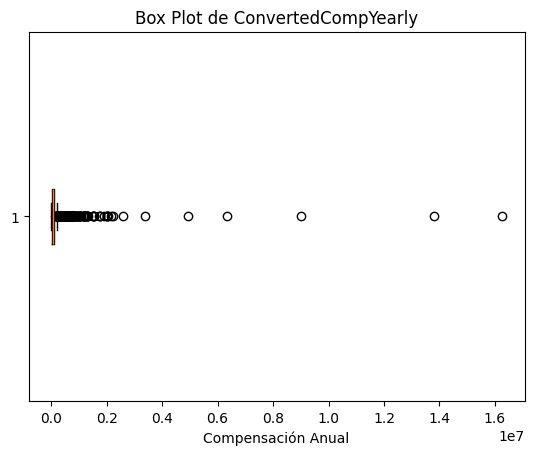

In [5]:
##Write your code here
comp_df = df['ConvertedCompYearly'].dropna()

Q1 = comp_df.quantile(0.25)
Q3 = comp_df.quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

outliers = df[
    (df['ConvertedCompYearly'] < lower_bound) |
    (df['ConvertedCompYearly'] > upper_bound)
]

print("Número de outliers detectados:", outliers.shape[0])

plt.figure()
plt.boxplot(comp_df, vert=False)
plt.title('Box Plot de ConvertedCompYearly')
plt.xlabel('Compensación Anual')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
original_size = df.shape[0]
print("Tamaño original del DataFrame:", original_size)

df_no_outliers = df[
    (df['ConvertedCompYearly'].isna()) |
    (
        (df['ConvertedCompYearly'] >= lower_bound) &
        (df['ConvertedCompYearly'] <= upper_bound)
    )
]

new_size = df_no_outliers.shape[0]
print("Tamaño del DataFrame sin outliers:", new_size)

print("Filas eliminadas:", original_size - new_size)


Tamaño original del DataFrame: 65437
Tamaño del DataFrame sin outliers: 64459
Filas eliminadas: 978


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


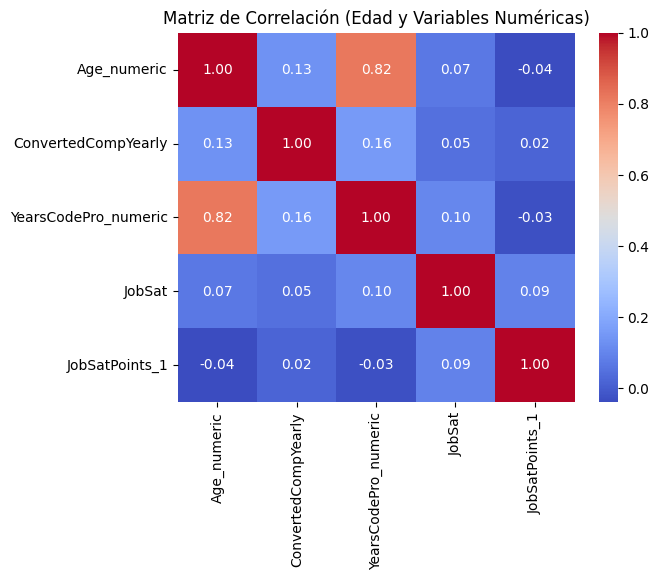

In [10]:
##Write your code here
df['YearsCodePro_numeric'] = (
    df['YearsCodePro']
    .replace('Less than 1 year', 0)
    .replace('More than 50 years', 50)
)

df['YearsCodePro_numeric'] = pd.to_numeric(
    df['YearsCodePro_numeric'],
    errors='coerce'
)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

numeric_cols = [
    'Age_numeric',
    'ConvertedCompYearly',
    'YearsCodePro_numeric',
    'JobSat',
    'JobSatPoints_1'
]

corr_df = df[numeric_cols].dropna()

correlation_matrix = corr_df.corr(method='pearson')
correlation_matrix

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación (Edad y Variables Numéricas)')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
